# Three Math Games

For this challenge, you need to create three math games using Python that do the following:

- Scatter plot game:
  - Randomly generate points on a graph and the player has to input the (x,y) coordinates
  - For added difficulty, make the graph larger
- Algebra practice game:
  - Generate one-step and two-step problems with random integer values and the player has to input the answer
  - Use positive and negative values. For added difficulty, make the numbers larger
- Projectile game:
  - Display a "wall" with random height and location. Player has to move sliders to adjust a parabolic path to clear the wall
  - For added difficulty, make a second level where players enter a, b, and c without sliders

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, fixed
from IPython.display import display
from ipywidgets import interactive

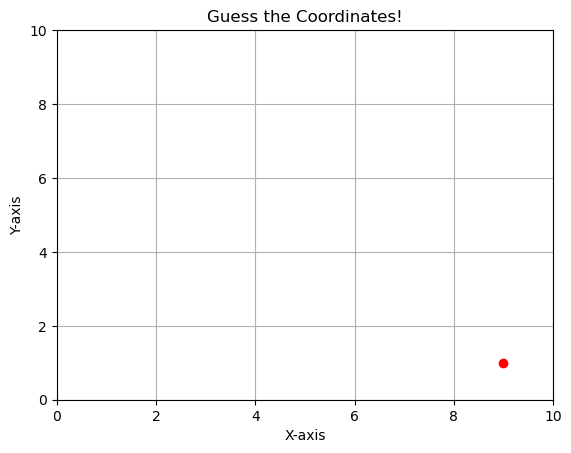

KeyboardInterrupt: Interrupted by user

In [7]:
# Scatter plot game
# Step 1: Generate Random Points
num_points = 1  # You can increase this to generate more points
x_values = np.random.randint(0, 10, num_points)
y_values = np.random.randint(0, 10, num_points)

# Create a DataFrame to store the points
points_df = pd.DataFrame({'x': x_values, 'y': y_values})

# Step 2: Plot the Points
plt.scatter(points_df['x'], points_df['y'], color='red')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Guess the Coordinates!")
plt.grid(True)

# Show the graph
plt.show()

# Step 3: Get Player Input
x_guess = int(input("Enter the x-coordinate of the point: "))
y_guess = int(input("Enter the y-coordinate of the point: "))

# Step 4: Check Accuracy
for i, row in points_df.iterrows():
    if row['x'] == x_guess and row['y'] == y_guess:
        print("Correct! The point was at (", row['x'], ",", row['y'], ")")
    else:
        print("Wrong guess! The point was at (", row['x'], ",", row['y'], ")")

In [6]:
# Algebra practice game
import random

# Function to generate a random one-step problem
def generate_one_step_problem():
    operations = ['+', '-', '*', '/']
    operation = random.choice(operations)
    num1 = random.randint(-100, 100)
    num2 = random.randint(-100, 100)

    # Ensure no division by zero
    if operation == '/':
        num2 = random.randint(1, 100) if num2 == 0 else num2
        question = f"{num1} {operation} {num2}"
        answer = round(num1 / num2, 2)  # Round to 2 decimal places for division
    else:
        question = f"{num1} {operation} {num2}"
        answer = eval(question)  # Simple evaluation of one-step problems

    return question, answer

# Function to generate a random two-step problem
def generate_two_step_problem():
    operations = ['+', '-', '*', '/']
    operation1 = random.choice(operations)
    operation2 = random.choice(operations)
    num1 = random.randint(-100, 100)
    num2 = random.randint(-100, 100)
    num3 = random.randint(-100, 100)

    # Ensure no division by zero
    if operation1 == '/':
        num2 = random.randint(1, 100) if num2 == 0 else num2
    if operation2 == '/':
        num3 = random.randint(1, 100) if num3 == 0 else num3

    # Create a two-step problem
    question = f"({num1} {operation1} {num2}) {operation2} {num3}"
    answer = eval(question)

    return question, answer

# Function to present a problem to the player
def present_problem(problem_type="one-step"):
    if problem_type == "one-step":
        question, answer = generate_one_step_problem()
    else:
        question, answer = generate_two_step_problem()

    print(f"Solve this {problem_type} problem: {question}")
    player_answer = float(input("Your answer: "))

    if round(player_answer, 2) == round(answer, 2):
        print("Correct!")
    else:
        print(f"Wrong! The correct answer was {answer}")

# Main loop for the player to keep solving problems
def main():
    while True:
        problem_type = random.choice(["one-step", "two-step"])
        present_problem(problem_type)

        # Ask if the player wants to continue
        play_again = input("Do you want to solve another problem? (yes/no): ").strip().lower()
        if play_again != 'yes':
            print("Thanks for playing!")
            break

# Run the game
main()

Solve this one-step problem: 5 * -36


Your answer:  -180


Correct!


Do you want to solve another problem? (yes/no):  no


Thanks for playing!


In [ ]:
#Projectile game
# Function to display the wall and the parabolic path
def plot_wall_and_path(a, b, c, wall_x, wall_height):
    # Create the parabola
    x = np.linspace(0, 10, 1000)
    y = a*x**2 + b*x + c

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'Path: y = {a}x^2 + {b}x + {c}', color='blue')

    # Plot the wall
    plt.plot([wall_x, wall_x], [0, wall_height], color='red', lw=5, label="Wall")
    plt.fill_betweenx([0, wall_height], wall_x, wall_x, color='red', alpha=0.6)

    # Set plot limits
    plt.xlim(0, 10)
    plt.ylim(0, max(50, wall_height + 10))
    
    # Labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Adjust the parabolic path to clear the wall!')
    plt.legend()
    plt.grid(True)
    plt.show()

# First level - Using sliders
def first_level_game():
    # Randomly generate wall position and height
    wall_x = np.random.uniform(4, 8)
    wall_height = np.random.uniform(10, 40)

    # Use sliders for 'a', 'b', and 'c'
    a_slider = FloatSlider(value=1, min=-2, max=2, step=0.1, description='a')
    b_slider = FloatSlider(value=0, min=-10, max=10, step=0.5, description='b')
    c_slider = FloatSlider(value=0, min=-10, max=10, step=0.5, description='c')

    interact(plot_wall_and_path, a=a_slider, b=b_slider, c=c_slider, wall_x=fixed(wall_x), wall_height=fixed(wall_height))

# Second level - Input for a, b, and c
def second_level_game():
    # Randomly generate wall position and height
    wall_x = np.random.uniform(4, 8)
    wall_height = np.random.uniform(10, 40)

    # Ask for user input for 'a', 'b', and 'c'
    a = float(input("Enter the value for 'a' (controls the curve): "))
    b = float(input("Enter the value for 'b' (controls the slope): "))
    c = float(input("Enter the value for 'c' (controls the height): "))

    # Plot the results
    plot_wall_and_path(a, b, c, wall_x, wall_height)

# Main game loop
def main_game():
    print("Welcome to the Parabolic Path Game!")
    print("First Level: Use sliders to adjust the path.")
    first_level_game()

    input("Press Enter to proceed to the second level...")

    print("Second Level: Now, enter the values for a, b, and c manually.")
    second_level_game()

# Run the game
main_game()


Welcome to the Parabolic Path Game!
First Level: Use sliders to adjust the path.


interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…